In [4]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [5]:
dataset_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


<Axes: xlabel='Transported'>

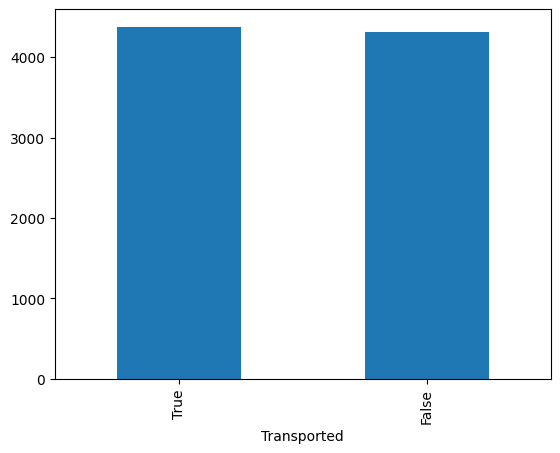

In [29]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [6]:
dataset_df = dataset_df.drop(['PassengerId', 'Name'], axis=1)
dataset_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [8]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [9]:
label = "Transported"
dataset_df[label] = dataset_df[label].astype(int)

In [10]:
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

In [11]:
dataset_df[['Deck','Cabin #', 'Side']] = dataset_df['Cabin'].str.split('/', expand = True)

In [12]:
dataset_df = dataset_df.drop(['Cabin','HomePlanet','Destination', 'Age'], axis=1)

In [13]:
dataset_df

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin #,Side
0,0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,1,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


**Using Sklearn to make decision tree to start**

In [79]:
X = dataset_df.drop('Transported', axis=1).copy()

In [80]:
X.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin #,Side
0,0,0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0,0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0,0,303.0,70.0,151.0,565.0,2.0,F,1,S


In [82]:
y = dataset_df['Transported'].copy()
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [86]:
#splitting data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
tree = DecisionTreeClassifier()

In [ ]:
tree = tree.fit(X_train, y_train)

In [ ]:
plt.figure(figsize = (15, 17))
plot_tree(tree, filled=True, rounded=True, class_names=['Transported', 'notTransported'], feature_names= X.columns)

**Below Method uses TensorFlow******

In [39]:
#creates a 0.2/0.8 ratio of true and false 
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6962 examples in training, 1731 examples in testing.


In [46]:
valid_ds_pd

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin #,Side
0,0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
8,0,0,0.0,785.0,17.0,216.0,0.0,1,F,3,S
12,0,0,73.0,0.0,1123.0,0.0,113.0,1,F,1,P
17,0,0,0.0,1.0,0.0,0.0,637.0,0,F,4,P
...,...,...,...,...,...,...,...,...,...,...,...
8666,0,0,28.0,1208.0,973.0,207.0,0.0,1,F,1792,S
8672,1,0,0.0,0.0,0.0,0.0,0.0,0,G,1502,P
8676,1,0,0.0,0.0,0.0,0.0,0.0,0,G,1504,P
8690,0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S


In [45]:
train_ds_pd

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin #,Side
1,0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
4,0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
5,0,0,0.0,483.0,0.0,291.0,0.0,1,F,0,P
6,0,0,42.0,1539.0,3.0,0.0,0.0,1,F,2,S
...,...,...,...,...,...,...,...,...,...,...,...
8686,0,0,1.0,1146.0,0.0,50.0,34.0,0,A,97,P
8687,0,0,0.0,3208.0,0.0,2.0,330.0,1,A,97,P
8688,0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,1,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S


In [42]:
#convert from pandas dataframe to tensorflow format
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [55]:
#specify model
model = tfdf.keras.RandomForestModel(verbose=2)

Use 4 thread(s) for training
Use /tmp/tmp0s6vuab0 as temporary training directory


In [ ]:
#train model
model.fit(train_ds)

In [57]:
#evaluate accuracy of model
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(valid_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")


2/2 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 0.7799

loss: 0.0000
accuracy: 0.7799


In [58]:
#visualize tree
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [60]:
#tune the model
tuned_model = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    )



Use /tmp/tmpgmsts4rk as temporary training directory


[WARNING 23-11-03 15:56:09.0047 UTC gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-03 15:56:09.0047 UTC gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-03 15:56:09.0047 UTC gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [ ]:
#train the tuned model
tuned_model.fit(train_ds, verbose=2)

In [64]:
tuned_model.compile(metrics=["accuracy"])
print(tuned_model.evaluate(valid_ds))
# >> 0.986851


2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.7863
[0.0, 0.7862507104873657]


Model #2

In [ ]:
? tfdf.keras.RandomForestModel

In [71]:
tuner = tfdf.tuner.RandomSearch()

In [74]:
model2 = tfdf.keras.RandomForestModel(tuner=tuner)
model2.fit(train_ds)

Use /tmp/tmppa4udvnn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.293899. Found 6962 examples.
Training model...


[INFO 23-11-03 16:09:44.9938 UTC kernel.cc:1243] Loading model from path /tmp/tmppa4udvnn/model/ with prefix 0ead973e8aab47c6


Model trained in 0:03:19.048098
Compiling model...


[INFO 23-11-03 16:09:45.8525 UTC decision_forest.cc:660] Model loaded with 300 root(s), 203746 node(s), and 10 input feature(s).
[INFO 23-11-03 16:09:45.8525 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-11-03 16:09:45.8525 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


In [75]:
model2.compile(metrics=["accuracy"])
print(tuned_model.evaluate(valid_ds))
# >> 0.986851

2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.7863
[0.0, 0.7862507104873657]


In [ ]:
#trying another method for pruning tree
path = clf_dt.cost_complexity_pruning_path(xtrain, ytrain)

**TRY removing the spending columns to see if that imporves accuracy**

In [94]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [95]:
dataset_df

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin #,Side
0,0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,1,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


In [108]:
new_data = dataset_df.drop(['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Cabin #'],axis=1)

In [109]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(new_data)) < test_ratio
  return new_data[~test_indices], new_data[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(new_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6944 examples in training, 1749 examples in testing.


In [110]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [115]:
new_model2 = tfdf.keras.RandomForestModel(verbose=2)

Use 4 thread(s) for training
Use /tmp/tmp7da4p4rb as temporary training directory


In [ ]:
new_model2.fit(train_ds)

In [117]:
new_model2.compile(metrics=["accuracy"])
evaluation = new_model2.evaluate(valid_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.7256

loss: 0.0000
accuracy: 0.7256


In [118]:
tfdf.model_plotter.plot_model_in_colab(new_model2, tree_idx=0, max_depth=3)

**Removing everything not a categorical variable**

In [14]:
new_data3 = dataset_df.drop(['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Cabin #','Deck'],axis=1)

In [15]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(new_data3)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6925 examples in training, 1768 examples in testing.


In [16]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [17]:
model3 = tfdf.keras.RandomForestModel(verbose=2)

Use 4 thread(s) for training
Use /tmp/tmpb37mggzk as temporary training directory


In [ ]:
model3.fit(train_ds)

In [23]:
tfdf.model_plotter.plot_model_in_colab(model3, tree_idx=0, max_depth=3)

In [21]:
model3.compile(metrics=["accuracy"])
evaluation = model3.evaluate(valid_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.7245

loss: 0.0000
accuracy: 0.7245


**Using Recommended Tensorflow Methods**

In [24]:
dataset_df.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin #,Side
0,0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [26]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6987 examples in training, 1706 examples in testing.


In [25]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpvxpoqw7g as temporary training directory


In [27]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

In [28]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.302730. Found 6987 examples.
Training model...


[INFO 23-11-03 18:05:14.2882 UTC kernel.cc:1243] Loading model from path /tmp/tmpvxpoqw7g/model/ with prefix e941da18595d406a


Model trained in 0:00:59.081031
Compiling model...


[INFO 23-11-03 18:05:15.1872 UTC decision_forest.cc:660] Model loaded with 300 root(s), 178088 node(s), and 10 input feature(s).
[INFO 23-11-03 18:05:15.1873 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-11-03 18:05:15.1873 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


In [29]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [32]:
rf.compile(metrics=["accuracy"])
evaluation = rf.evaluate(valid_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - accuracy: 0.7937

loss: 0.0000
accuracy: 0.7937


In [33]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6987, accuracy=0.795334192070989, loss=1.424714476591051, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

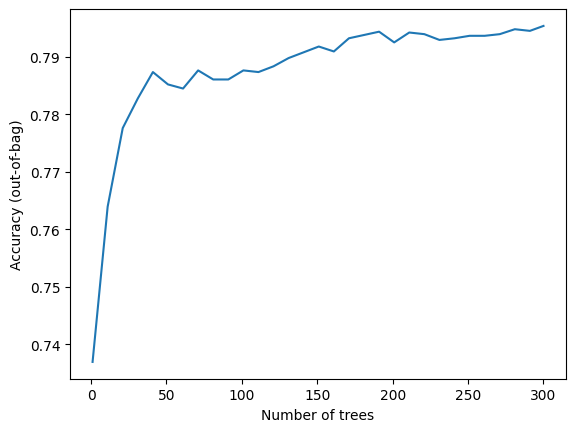

In [34]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [36]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [37]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("CryoSleep" (1; #1), 230.0),
 ("RoomService" (1; #4), 37.0),
 ("FoodCourt" (1; #3), 26.0),
 ("ShoppingMall" (1; #5), 4.0),
 ("VRDeck" (1; #9), 2.0),
 ("Spa" (1; #7), 1.0)]